# LIBRARIES

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
# from imblearn.over_sampling import SMOTE

# LOAD IMAGES

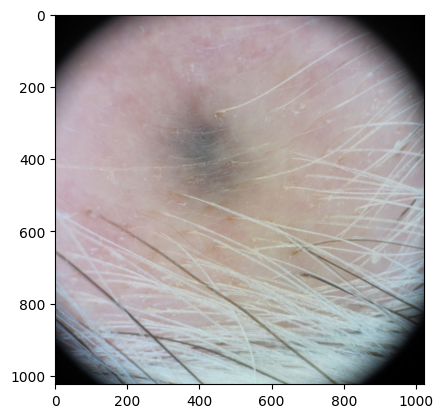

In [ ]:
path_train = 'nev00010.jpg'
image_read = cv2.imread(path_train)
image_show = plt.imshow(cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB))

## Nueva sección

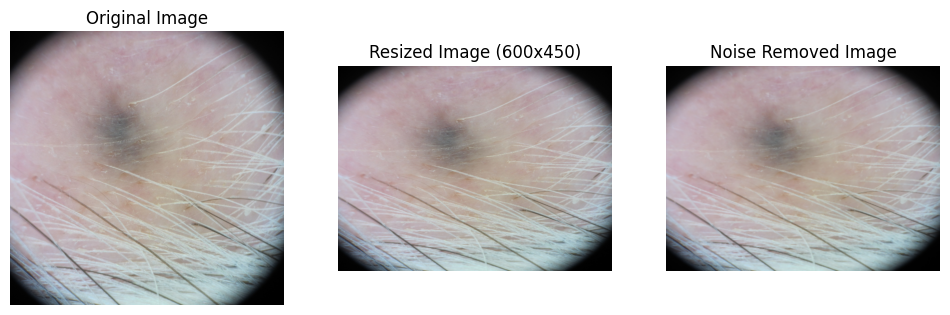

In [ ]:
# 1_PREPROCESSING
# 1.1 Image resizing (600x450)
resized_image = cv2.resize(image_read, (600, 450))

# 1.2 Noise removal with a 3x3 median filter
noise_removed_image = cv2.medianBlur(resized_image, 3)

# ------------------------------
# PLOT RESULTS
# ------------------------------

# Plotting the images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Resized image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image (600x450)')
plt.axis('off')

# Noise removed image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(noise_removed_image, cv2.COLOR_BGR2RGB))
plt.title('Noise Removed Image')
plt.axis('off')

plt.show()

# Mean Enhacement

Mean Value: 158.79497530864197
Standard Deviation: 46.06412011975045


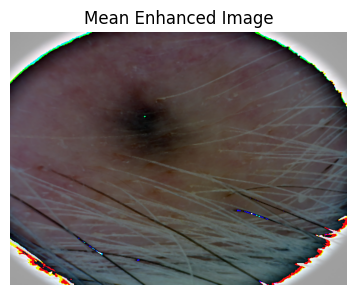

In [ ]:
# 2_IMAGE ENHANCEMENT
# 2.1 Mean
def calculate_mean(image):
    return np.mean(image)

# 2.2 Standard Deviation
def calculate_std_dev(image):
    return np.std(image)

# Calculate mean and standard deviation of the noise-removed image
mean_value = calculate_mean(noise_removed_image)
std_dev_value = calculate_std_dev(noise_removed_image)

print(f"Mean Value: {mean_value}")
print(f"Standard Deviation: {std_dev_value}")

# ------------------------------
# PLOT RESULTS
# ------------------------------

# Mean enhancement (Brightness adjustment)
mean_enhanced_image = noise_removed_image + int(mean_value)

# Standard Deviation enhancement (Contrast adjustment)
std_dev_enhanced_image = cv2.convertScaleAbs(noise_removed_image, alpha=std_dev_value)

# Plotting the enhanced images
plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(mean_enhanced_image,cv2.COLOR_BGR2RGB))
plt.title('Mean Enhanced Image')
plt.axis('off')

plt.show()

# 1st Segmentation not working for mots with hair ON it

Enhanced Gray Image is Grayscale
Selected Otsu Threshold: 75.0
Image is Grayscale
Hair-Removed Image is Grayscale
Segmented Image is Grayscale
Statistics for Enhanced Gray Image:
Minimum Value: 5
Mean Value: 67.04442592592592
Maximum Value: 245

Statistics for OTSU's Thresholding Image:
Minimum Value: 0
Mean Value: 29.855777777777778
Maximum Value: 255

Statistics for Hair-Removed Image:
Minimum Value: 0
Mean Value: 29.855777777777778
Maximum Value: 255

Statistics for Segmented Image:
Minimum Value: 0
Mean Value: 20.623833333333334
Maximum Value: 255



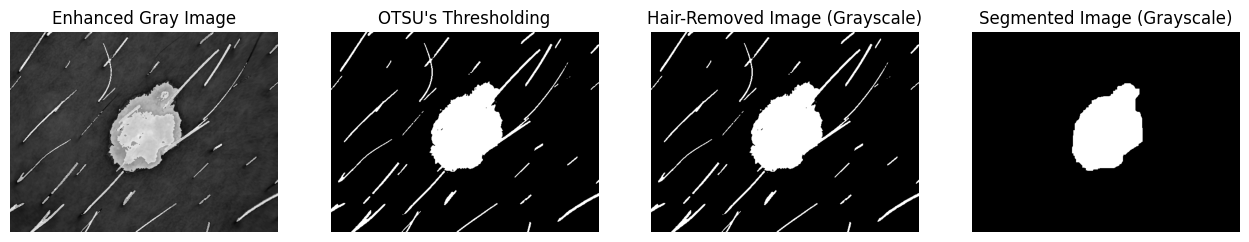

In [ ]:
# 3. SEGMENTATION

# Function to print image statistics
def print_image_statistics(image, label):
    print(f"Statistics for {label} Image:")
    print(f"Minimum Value: {np.min(image)}")
    print(f"Mean Value: {np.mean(image)}")
    print(f"Maximum Value: {np.max(image)}")
    print()

# 3.1 RGB to gray
def rgb_to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3.2 OTSU's thresholding
def otsu_thresholding(image_gray):
    _, thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    print(f"Selected Otsu Threshold: {_}")
    return thresh

# 3.3 Hair removal
def remove_hair(image):
    # Check if the image is grayscale or binary
    if len(image.shape) == 2:
        print("Image is Grayscale")
    elif len(image.shape) == 3 and image.shape[2] == 3:
        print("Image is RGB")
    elif len(image.shape) == 3 and image.shape[2] == 1:
        print("Image is Binary")

    # Define a lower and upper threshold for the hair color in grayscale
    lower_hair = 100
    upper_hair = 255

    # Create a mask using the inRange function
    mask = cv2.inRange(image, lower_hair, upper_hair)

    # Apply the mask to the original grayscale image
    result = cv2.bitwise_and(image, image, mask=mask)

    return result

# 3.4 Morphological operations
def morphological_operations(image):
    kernel = np.ones((7, 7), np.uint8)
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=2)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)
    return closing

# ------------------------------
# PLOT RESULTS
# ------------------------------

# Convert enhanced image to gray
enhanced_gray_image = rgb_to_gray(mean_enhanced_image)

# Print image type information
if len(enhanced_gray_image.shape) == 2:
    print("Enhanced Gray Image is Grayscale")
elif len(enhanced_gray_image.shape) == 3 and enhanced_gray_image.shape[2] == 3:
    print("Enhanced Gray Image is RGB")
elif len(enhanced_gray_image.shape) == 3 and enhanced_gray_image.shape[2] == 1:
    print("Enhanced Gray Image is Binary")

# Perform OTSU's thresholding
otsu_thresholded_image = otsu_thresholding(enhanced_gray_image)

# Remove hair
hair_removed_image = remove_hair(otsu_thresholded_image)

# Print image type information
if len(hair_removed_image.shape) == 2:
    print("Hair-Removed Image is Grayscale")
elif len(hair_removed_image.shape) == 3 and hair_removed_image.shape[2] == 3:
    print("Hair-Removed Image is RGB")
elif len(hair_removed_image.shape) == 3 and hair_removed_image.shape[2] == 1:
    print("Hair-Removed Image is Binary")

# Perform morphological operations
segmented_image = morphological_operations(hair_removed_image)

# Print image type information
if len(segmented_image.shape) == 2:
    print("Segmented Image is Grayscale")
elif len(segmented_image.shape) == 3 and segmented_image.shape[2] == 3:
    print("Segmented Image is RGB")
elif len(segmented_image.shape) == 3 and segmented_image.shape[2] == 1:
    print("Segmented Image is Binary")

# Print statistics for Enhanced Gray Image
print_image_statistics(enhanced_gray_image, 'Enhanced Gray')

# Print statistics for OTSU's Thresholding result
print_image_statistics(otsu_thresholded_image, "OTSU's Thresholding")

# Print statistics for Hair-Removed Image
print_image_statistics(hair_removed_image, 'Hair-Removed')

# Print statistics for Morphological Operations result
print_image_statistics(segmented_image, 'Segmented')

# Plotting the segmentation results
plt.figure(figsize=(20, 6))

# Enhanced gray image
plt.subplot(1, 5, 1)
plt.imshow(enhanced_gray_image, cmap='gray')
plt.title('Enhanced Gray Image')
plt.axis('off')

# OTSU's thresholding result
plt.subplot(1, 5, 2)
plt.imshow(otsu_thresholded_image, cmap='gray')
plt.title("OTSU's Thresholding")
plt.axis('off')

# Hair removal result
plt.subplot(1, 5, 3)
if len(hair_removed_image.shape) == 2:
    plt.imshow(hair_removed_image, cmap='gray')
    plt.title('Hair-Removed Image (Grayscale)')
elif len(hair_removed_image.shape) == 3:
    plt.imshow(hair_removed_image)
    plt.title('Hair-Removed Image (RGB)')
plt.axis('off')

# Morphological operations result
plt.subplot(1, 5, 4)
if len(segmented_image.shape) == 2:
    plt.imshow(segmented_image, cmap='gray')
    plt.title('Segmented Image (Grayscale)')
elif len(segmented_image.shape) == 3:
    plt.imshow(segmented_image)
    plt.title('Segmented Image (RGB)')
plt.axis('off')

plt.show()

# 2nd Segmentation different hair removal technique
*   Hair removal actually plotted


Enhanced Gray Image is Grayscale
Hair-Removed Image is Grayscale
Segmented Image is Grayscale
Statistics for Enhanced Gray Image:
Minimum Value: 0
Mean Value: 83.60616666666667
Maximum Value: 253

Statistics for OTSU's Thresholding Image:
Minimum Value: 0
Mean Value: 23.130388888888888
Maximum Value: 255

Statistics for Hair-Removed Image:
Minimum Value: 0
Mean Value: 22.19161111111111
Maximum Value: 255

Statistics for Segmented Image:
Minimum Value: 0
Mean Value: 21.929055555555557
Maximum Value: 255



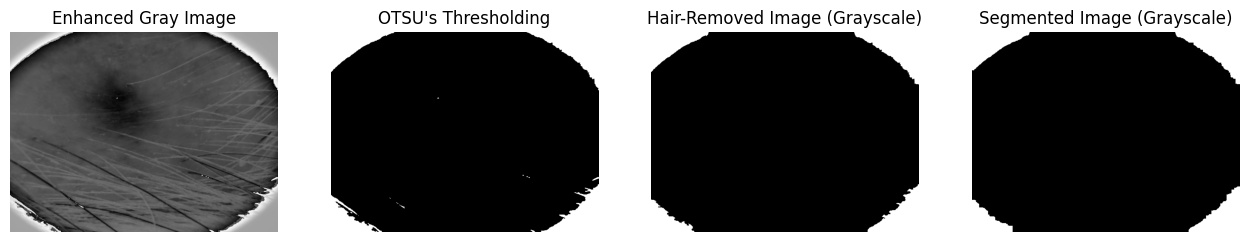

In [ ]:
#SECOND TRIAL PREPROCESSING

# Function to print image statistics
def print_image_statistics(image, label):
    print(f"Statistics for {label} Image:")
    print(f"Minimum Value: {np.min(image)}")
    print(f"Mean Value: {np.mean(image)}")
    print(f"Maximum Value: {np.max(image)}")
    print()

# Hair removal function
def hair_removal(img):
    marker = cv2.morphologyEx(img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (41, 41)))
    mask = img.copy()
    marker_prev = np.zeros_like(marker)
    marker_channels = [np.zeros_like(marker)] * 3
    marker_prev_channels = [np.zeros_like(marker)] * 3

    iteration = 0
    max_iterations = 10  # Adjust the maximum number of iterations as needed

    while iteration < max_iterations:
        marker_prev = marker.copy()
        cv2.split(marker_prev, marker_prev_channels)
        marker = cv2.dilate(marker, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
        cv2.min(marker, mask, marker)
        cv2.split(marker, marker_channels)

        # Add a criterion to break the loop (you can customize this based on your needs)
        if np.array_equal(marker_prev, marker):
            break

        iteration += 1

    return marker

# Convert enhanced image to gray
enhanced_gray_image = cv2.cvtColor(mean_enhanced_image, cv2.COLOR_BGR2GRAY)

# Print image type information
if len(enhanced_gray_image.shape) == 2:
    print("Enhanced Gray Image is Grayscale")
elif len(enhanced_gray_image.shape) == 3 and enhanced_gray_image.shape[2] == 3:
    print("Enhanced Gray Image is RGB")
elif len(enhanced_gray_image.shape) == 3 and enhanced_gray_image.shape[2] == 1:
    print("Enhanced Gray Image is Binary")

# Perform OTSU's thresholding
otsu_thresholded_image = otsu_thresholding(enhanced_gray_image)

# Hair removal
hair_removed_image = hair_removal(otsu_thresholded_image)

# Print image type information
if len(hair_removed_image.shape) == 2:
    print("Hair-Removed Image is Grayscale")
elif len(hair_removed_image.shape) == 3 and hair_removed_image.shape[2] == 3:
    print("Hair-Removed Image is RGB")
elif len(hair_removed_image.shape) == 3 and hair_removed_image.shape[2] == 1:
    print("Hair-Removed Image is Binary")

# Perform morphological operations
segmented_image = morphological_operations(hair_removed_image)

# Print image type information
if len(segmented_image.shape) == 2:
    print("Segmented Image is Grayscale")
elif len(segmented_image.shape) == 3 and segmented_image.shape[2] == 3:
    print("Segmented Image is RGB")
elif len(segmented_image.shape) == 3 and segmented_image.shape[2] == 1:
    print("Segmented Image is Binary")

# Print statistics for Enhanced Gray Image
print_image_statistics(enhanced_gray_image, 'Enhanced Gray')

# Print statistics for OTSU's Thresholding result
print_image_statistics(otsu_thresholded_image, "OTSU's Thresholding")

# Print statistics for Hair-Removed Image
print_image_statistics(hair_removed_image, 'Hair-Removed')

# Print statistics for Morphological Operations result
print_image_statistics(segmented_image, 'Segmented')

# Plotting the segmentation results
plt.figure(figsize=(20, 6))

# Enhanced gray image
plt.subplot(1, 5, 1)
plt.imshow(enhanced_gray_image, cmap='gray')
plt.title('Enhanced Gray Image')
plt.axis('off')

# OTSU's thresholding result
plt.subplot(1, 5, 2)
plt.imshow(otsu_thresholded_image, cmap='gray')
plt.title("OTSU's Thresholding")
plt.axis('off')

# Hair removal result
plt.subplot(1, 5, 3)
if len(hair_removed_image.shape) == 2:
    plt.imshow(hair_removed_image, cmap='gray')
    plt.title('Hair-Removed Image (Grayscale)')
elif len(hair_removed_image.shape) == 3:
    plt.imshow(hair_removed_image)
    plt.title('Hair-Removed Image (RGB)')
plt.axis('off')

# Morphological operations result
plt.subplot(1, 5, 4)
if len(segmented_image.shape) == 2:
    plt.imshow(segmented_image, cmap='gray')
    plt.title('Segmented Image (Grayscale)')
elif len(segmented_image.shape) == 3:
    plt.imshow(segmented_image)
    plt.title('Segmented Image (RGB)')
plt.axis('off')

plt.show()

Enhanced Gray Image is Grayscale
Statistics for Enhanced Gray Image:
Minimum Value: 0
Mean Value: 158.63935375213623
Maximum Value: 234

Statistics for OTSU's Thresholding Image:
Minimum Value: 0
Mean Value: 230.14921188354492
Maximum Value: 255

Statistics for Hair-Removed Image:
Minimum Value: 0
Mean Value: 227.93888568878174
Maximum Value: 255

Statistics for Segmented Image:
Minimum Value: 0
Mean Value: 227.93888568878174
Maximum Value: 255



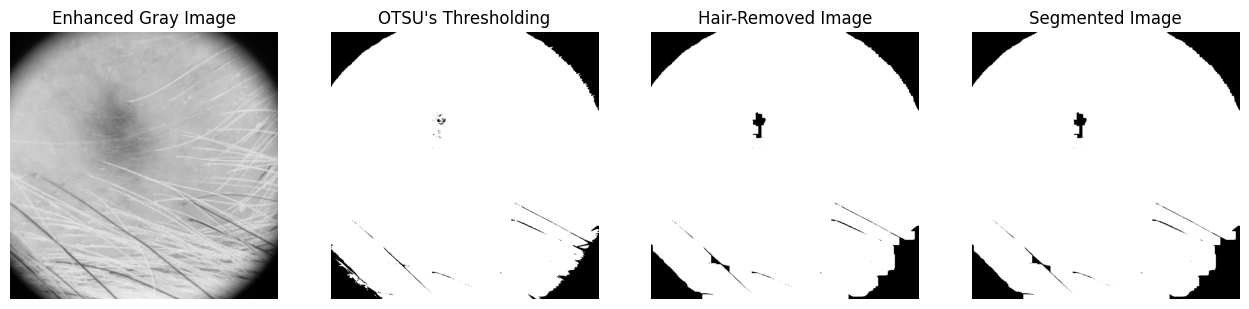

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to print image statistics
def print_image_statistics(image, label):
    print(f"Statistics for {label} Image:")
    print(f"Minimum Value: {np.min(image)}")
    print(f"Mean Value: {np.mean(image)}")
    print(f"Maximum Value: {np.max(image)}")
    print()

# Function to perform OTSU's thresholding
def otsu_thresholding(image):
    _, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresholded

# Function to perform morphological operations
def morphological_operations(image):
    kernel = np.ones((5, 5), np.uint8)
    morph_open = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=2)
    return morph_open

# Function to perform contrast stretching
def contrast_stretching(image):
    avg = np.mean(image)
    std_dev = np.std(image)
    low_in = avg - 0.4 * std_dev
    high_in = avg + 0.4 * std_dev

    # Clip and scale intensity values to the range [0, 255]
    stretched_image = np.clip((image - low_in) / (high_in - low_in) * 255, 0, 255).astype(np.uint8)

    return stretched_image

# Function to perform hair removal using bottom-hat filtering
def remove_hair(image):
    # Convert the grayscale image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    # Convert the RGB image to HSV color space
    hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

    # Define a lower and upper threshold for the hair color in HSV
    lower_hair = np.array([0, 20, 70], dtype=np.uint8)
    upper_hair = np.array([20, 255, 255], dtype=np.uint8)

    # Create a mask using the inRange function
    mask_hair = cv2.inRange(hsv, lower_hair, upper_hair)

    # Apply the mask to the original RGB image
    result_hair_removed = cv2.bitwise_and(image_rgb, image_rgb, mask=255 - mask_hair)

    # Use morphological operations to further refine hair removal
    kernel = np.ones((15, 15), np.uint8)
    result_hair_removed = cv2.morphologyEx(result_hair_removed, cv2.MORPH_OPEN, kernel, iterations=2)

    return result_hair_removed

# Load the image
path_train = 'nev00010.jpg'
image_read = cv2.imread(path_train)
image_gray = cv2.cvtColor(image_read, cv2.COLOR_BGR2GRAY)

# Resize the image to 767x1022
image_resized = cv2.resize(image_gray, (1022, 767))

# Noise removal with a 3x3 median filter
image_noise_removed = cv2.medianBlur(image_resized, 3)

# Contrast stretching on the grayscale image
image_contrast_stretched = contrast_stretching(image_noise_removed)

# Hair removal using bottom-hat filtering
hair_removed_image = remove_hair(image_contrast_stretched)

# Convert enhanced image to gray
enhanced_gray_image = cv2.cvtColor(image_read, cv2.COLOR_BGR2GRAY)

# Print image type information
if len(enhanced_gray_image.shape) == 2:
    print("Enhanced Gray Image is Grayscale")
elif len(enhanced_gray_image.shape) == 3 and enhanced_gray_image.shape[2] == 3:
    print("Enhanced Gray Image is RGB")
elif len(enhanced_gray_image.shape) == 3 and enhanced_gray_image.shape[2] == 1:
    print("Enhanced Gray Image is Binary")

# Perform OTSU's thresholding
otsu_thresholded_image = otsu_thresholding(enhanced_gray_image)

# Hair removal using bottom-hat filtering
hair_removed_image = remove_hair(otsu_thresholded_image)

# Perform morphological operations
segmented_image = morphological_operations(hair_removed_image)

# Print statistics for Enhanced Gray Image
print_image_statistics(enhanced_gray_image, 'Enhanced Gray')

# Print statistics for OTSU's Thresholding result
print_image_statistics(otsu_thresholded_image, "OTSU's Thresholding")

# Print statistics for Hair-Removed Image
print_image_statistics(hair_removed_image, 'Hair-Removed')

# Print statistics for Morphological Operations result
print_image_statistics(segmented_image, 'Segmented')

# Plotting the segmentation results
plt.figure(figsize=(20, 6))

# Enhanced gray image
plt.subplot(1, 5, 1)
plt.imshow(enhanced_gray_image, cmap='gray')
plt.title('Enhanced Gray Image')
plt.axis('off')

# OTSU's thresholding result
plt.subplot(1, 5, 2)
plt.imshow(otsu_thresholded_image, cmap='gray')
plt.title("OTSU's Thresholding")
plt.axis('off')

# Hair removal result
plt.subplot(1, 5, 3)
plt.imshow(hair_removed_image)
plt.title('Hair-Removed Image')
plt.axis('off')

# Morphological operations result
plt.subplot(1, 5, 4)
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.axis('off')

plt.show()

Enhanced Gray Image is Grayscale
Statistics for Enhanced Gray Image:
Minimum Value: 0
Mean Value: 158.63935375213623
Maximum Value: 234

Statistics for Hair-Removed Image:
Minimum Value: 0
Mean Value: 151.71384431681622
Maximum Value: 255



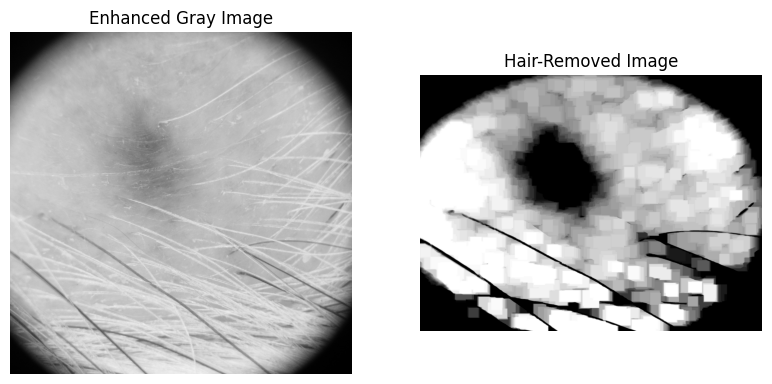

In [ ]:
# Load the image
path_train = 'nev00010.jpg'
image_read = cv2.imread(path_train)
image_gray = cv2.cvtColor(image_read, cv2.COLOR_BGR2GRAY)

# Function to print image statistics
def print_image_statistics(image, label):
    print(f"Statistics for {label} Image:")
    print(f"Minimum Value: {np.min(image)}")
    print(f"Mean Value: {np.mean(image)}")
    print(f"Maximum Value: {np.max(image)}")
    print()

# Function to perform contrast stretching
def contrast_stretching(image):
    avg = np.mean(image)
    std_dev = np.std(image)
    low_in = avg - 0.4 * std_dev
    high_in = avg + 0.4 * std_dev

    # Clip and scale intensity values to the range [0, 255]
    stretched_image = np.clip((image - low_in) / (high_in - low_in) * 255, 0, 255).astype(np.uint8)

    return stretched_image

# Function to perform hair removal using bottom-hat filtering
def remove_hair(image):
    # Convert the grayscale image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    # Convert the RGB image to HSV color space
    hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

    # Define a lower and upper threshold for the hair color in HSV
    lower_hair = np.array([0, 20, 70], dtype=np.uint8)
    upper_hair = np.array([20, 255, 255], dtype=np.uint8)

    # Create a mask using the inRange function
    mask_hair = cv2.inRange(hsv, lower_hair, upper_hair)

    # Apply the mask to the original RGB image
    result_hair_removed = cv2.bitwise_and(image_rgb, image_rgb, mask=255 - mask_hair)

    # Use morphological operations to further refine hair removal
    kernel = np.ones((15, 15), np.uint8)
    result_hair_removed = cv2.morphologyEx(result_hair_removed, cv2.MORPH_OPEN, kernel, iterations=2)

    return result_hair_removed

# Resize the image to 767x1022
image_resized = cv2.resize(image_gray, (1022, 767))

# Noise removal with a 3x3 median filter
image_noise_removed = cv2.medianBlur(image_resized, 3)

# Contrast stretching on the grayscale image
image_contrast_stretched = contrast_stretching(image_noise_removed)

# Hair removal using bottom-hat filtering
hair_removed_image = remove_hair(image_contrast_stretched)

# Convert enhanced image to gray
enhanced_gray_image = cv2.cvtColor(image_read, cv2.COLOR_BGR2GRAY)

# Print image type information
if len(enhanced_gray_image.shape) == 2:
    print("Enhanced Gray Image is Grayscale")
elif len(enhanced_gray_image.shape) == 3 and enhanced_gray_image.shape[2] == 3:
    print("Enhanced Gray Image is RGB")
elif len(enhanced_gray_image.shape) == 3 and enhanced_gray_image.shape[2] == 1:
    print("Enhanced Gray Image is Binary")

# Print statistics for Enhanced Gray Image
print_image_statistics(enhanced_gray_image, 'Enhanced Gray')

# Print statistics for Hair-Removed Image
print_image_statistics(hair_removed_image, 'Hair-Removed')

# Plotting the segmentation results
plt.figure(figsize=(15, 6))

# Enhanced gray image
plt.subplot(1, 3, 1)
plt.imshow(enhanced_gray_image, cmap='gray')
plt.title('Enhanced Gray Image')
plt.axis('off')

# Hair removal result
plt.subplot(1, 3, 2)
plt.imshow(hair_removed_image)
plt.title('Hair-Removed Image')
plt.axis('off')

plt.show()

Enhanced Gray Image is Grayscale
Statistics for Enhanced Gray Image:
Minimum Value: 0
Mean Value: 158.63935375213623
Maximum Value: 234

Statistics for Hair-Removed Image:
Minimum Value: 0
Mean Value: 189.86786141650316
Maximum Value: 255



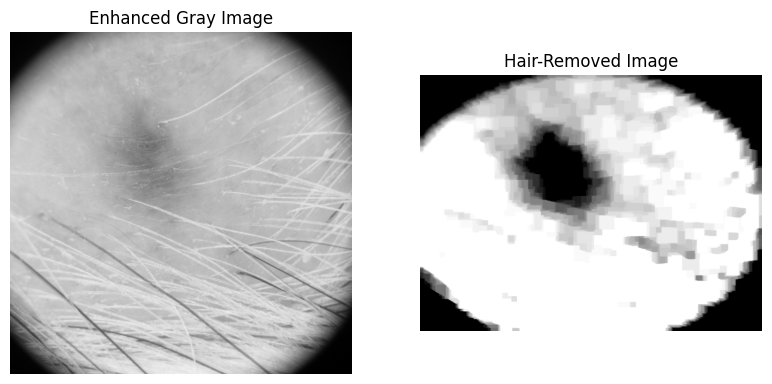

In [ ]:
# Load the image
path_train = 'nev00010.jpg'
image_read = cv2.imread(path_train)
image_gray = cv2.cvtColor(image_read, cv2.COLOR_BGR2GRAY)

# Function to print image statistics
def print_image_statistics(image, label):
    print(f"Statistics for {label} Image:")
    print(f"Minimum Value: {np.min(image)}")
    print(f"Mean Value: {np.mean(image)}")
    print(f"Maximum Value: {np.max(image)}")
    print()

# Function to perform contrast stretching
def contrast_stretching(image):
    avg = np.mean(image)
    std_dev = np.std(image)
    low_in = avg - 0.4 * std_dev
    high_in = avg + 0.4 * std_dev

    # Clip and scale intensity values to the range [0, 255]
    stretched_image = np.clip((image - low_in) / (high_in - low_in) * 255, 0, 255).astype(np.uint8)

    return stretched_image

# Function to perform hair removal using bottom-hat filtering
def remove_hair(image):
    # Convert the grayscale image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    # Convert the RGB image to HSV color space
    hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

    # Define a lower and upper threshold for the hair color in HSV
    lower_hair = np.array([0, 20, 70], dtype=np.uint8)
    upper_hair = np.array([20, 255, 255], dtype=np.uint8)

    # Create a mask using the inRange function
    mask_hair = cv2.inRange(hsv, lower_hair, upper_hair)

    # Apply bottom-hat filtering
    kernel = np.ones((15, 15), np.uint8)
    bottom_hat = cv2.morphologyEx(image_rgb, cv2.MORPH_BLACKHAT, kernel)

    # Combine the original image and the bottom-hat result
    result_hair_removed = cv2.add(image_rgb, bottom_hat)

    # Use morphological operations to further refine hair removal
    kernel = np.ones((15, 15), np.uint8)
    result_hair_removed = cv2.morphologyEx(result_hair_removed, cv2.MORPH_OPEN, kernel, iterations=2)

    return result_hair_removed

# Resize the image to 767x1022
image_resized = cv2.resize(image_gray, (1022, 767))

# Noise removal with a 3x3 median filter
image_noise_removed = cv2.medianBlur(image_resized, 3)

# Contrast stretching on the grayscale image
image_contrast_stretched = contrast_stretching(image_noise_removed)

# Hair removal using bottom-hat filtering
hair_removed_image = remove_hair(image_contrast_stretched)

# Convert enhanced image to gray
enhanced_gray_image = cv2.cvtColor(image_read, cv2.COLOR_BGR2GRAY)

# Print image type information
if len(enhanced_gray_image.shape) == 2:
    print("Enhanced Gray Image is Grayscale")
elif len(enhanced_gray_image.shape) == 3 and enhanced_gray_image.shape[2] == 3:
    print("Enhanced Gray Image is RGB")
elif len(enhanced_gray_image.shape) == 3 and enhanced_gray_image.shape[2] == 1:
    print("Enhanced Gray Image is Binary")

# Print statistics for Enhanced Gray Image
print_image_statistics(enhanced_gray_image, 'Enhanced Gray')

# Print statistics for Hair-Removed Image
print_image_statistics(hair_removed_image, 'Hair-Removed')

# Plotting the segmentation results
plt.figure(figsize=(15, 6))

# Enhanced gray image
plt.subplot(1, 3, 1)
plt.imshow(enhanced_gray_image, cmap='gray')
plt.title('Enhanced Gray Image')
plt.axis('off')

# Hair removal result
plt.subplot(1, 3, 2)
plt.imshow(hair_removed_image)
plt.title('Hair-Removed Image')
plt.axis('off')

plt.show()

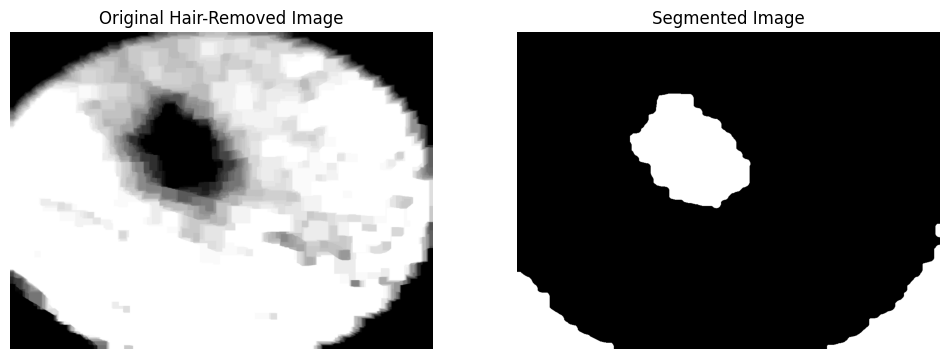

In [ ]:
# Convert the hair-removed image to grayscale
hair_removed_gray = cv2.cvtColor(hair_removed_image, cv2.COLOR_RGB2GRAY)

# Apply GaussianBlur to the grayscale image
blurred = cv2.GaussianBlur(hair_removed_gray, (5, 5), 0)

# Perform OTSU's thresholding
_, thresholded_image = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Remove background triangles by creating a mask
background_mask = np.zeros_like(thresholded_image)
background_mask[:30, :] = 255  # Assuming the triangles are in the top part of the image
thresholded_image_no_triangles = cv2.bitwise_and(thresholded_image, thresholded_image, mask=cv2.bitwise_not(background_mask))

# Invert the image to make the skin lesion white and the background black
inverted_image = cv2.bitwise_not(thresholded_image_no_triangles)

# Flood fill operation on 4-connected pixels in the background to remove holes
h, w = inverted_image.shape[:2]
mask = np.zeros((h + 2, w + 2), np.uint8)
cv2.floodFill(inverted_image, mask, (0, 0), 0)

# Perform morphological opening to remove small objects (fewer than 2000 pixels)
kernel_opening = np.ones((5, 5), np.uint8)
segmented_image = cv2.morphologyEx(inverted_image, cv2.MORPH_OPEN, kernel_opening, iterations=1)

# Lesion border smoothening using opening and closing operations
kernel_smoothing = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
segmented_image_smoothed = cv2.morphologyEx(segmented_image, cv2.MORPH_OPEN, kernel_smoothing, iterations=1)
segmented_image_smoothed = cv2.morphologyEx(segmented_image_smoothed, cv2.MORPH_CLOSE, kernel_smoothing, iterations=1)

# Display the original hair-removed image and the segmented result
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(hair_removed_image)
plt.title('Original Hair-Removed Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image_smoothed, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')

plt.show()

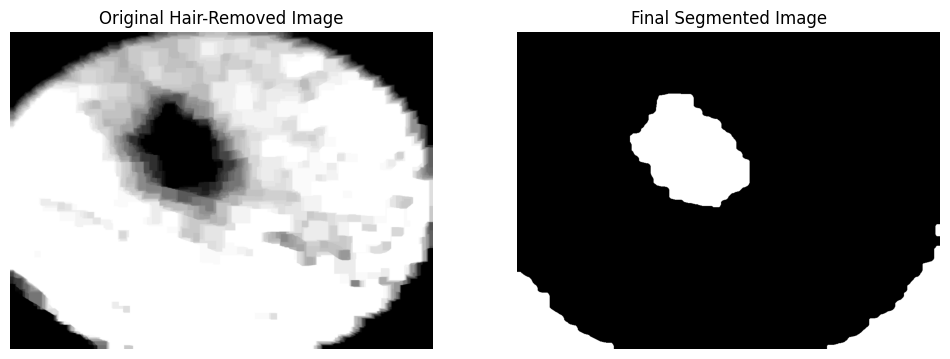

In [ ]:
# Convert the hair-removed image to grayscale
hair_removed_gray = cv2.cvtColor(hair_removed_image, cv2.COLOR_RGB2GRAY)

# Apply GaussianBlur to the grayscale image
blurred = cv2.GaussianBlur(hair_removed_gray, (5, 5), 0)

# Perform OTSU's thresholding
_, thresholded_image = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Remove background triangles by creating a mask
background_mask = np.zeros_like(thresholded_image)
background_mask[:30, :] = 255  # Assuming the triangles are in the top part of the image
thresholded_image_no_triangles = cv2.bitwise_and(thresholded_image, thresholded_image, mask=cv2.bitwise_not(background_mask))

# Invert the image to make the skin lesion white and the background black
inverted_image = cv2.bitwise_not(thresholded_image_no_triangles)

# Flood fill operation on 4-connected pixels in the background to remove holes
h, w = inverted_image.shape[:2]
mask = np.zeros((h + 2, w + 2), np.uint8)
cv2.floodFill(inverted_image, mask, (0, 0), 0)

# Perform morphological opening to remove small objects (fewer than 2000 pixels)
kernel_opening = np.ones((5, 5), np.uint8)
segmented_image = cv2.morphologyEx(inverted_image, cv2.MORPH_OPEN, kernel_opening, iterations=1)

# Lesion border smoothening using opening and closing operations
kernel_smoothing = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
segmented_image_smoothed = cv2.morphologyEx(segmented_image, cv2.MORPH_OPEN, kernel_smoothing, iterations=1)
segmented_image_smoothed = cv2.morphologyEx(segmented_image_smoothed, cv2.MORPH_CLOSE, kernel_smoothing, iterations=1)

# Additional step: Perform another morphological opening to remove smaller objects
larger_kernel_opening = np.ones((15, 15), np.uint8)
final_segmented_image = cv2.morphologyEx(segmented_image_smoothed, cv2.MORPH_OPEN, larger_kernel_opening, iterations=1)

# Display the original hair-removed image and the segmented result
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(hair_removed_image)
plt.title('Original Hair-Removed Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(final_segmented_image, cmap='gray')
plt.title('Final Segmented Image')
plt.axis('off')

plt.show()

#3rd (Not good)


---


*   Resizing > noiseremoval
*   Mean > Standard
*   Hair removal

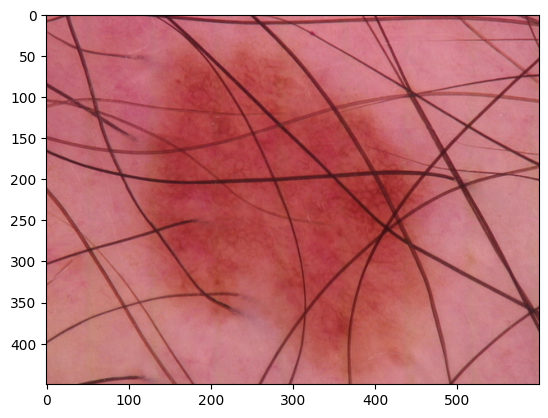

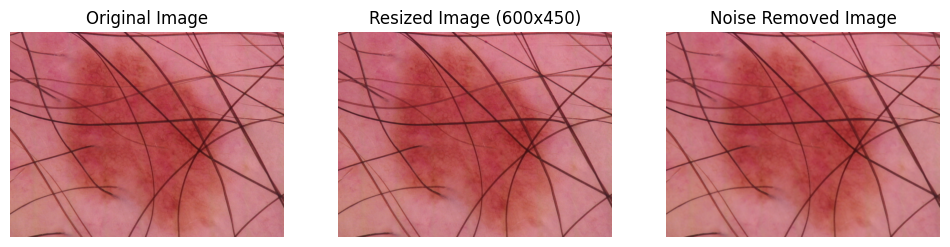

Mean Value: 128.11298148148148
Standard Deviation: 50.06517410977048


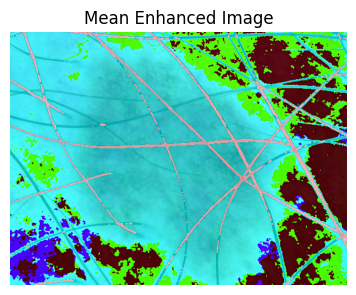

Image is RGB
Hair-Removed Image is RGB
Statistics for Hair-Removed Image:
Minimum Value: 0
Mean Value: 2.9119395061728395
Maximum Value: 255



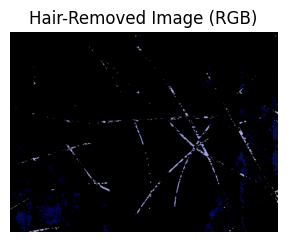

In [ ]:
# THIRD TRIAL
# Trying to remove hair right after the mean enhacement:

path_train = 'nev00014.jpg'
image_read = cv2.imread(path_train)
image_show = plt.imshow(cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB))

# 1_PREPROCESSING
# 1.1 Image resizing (600x450)
resized_image = cv2.resize(image_read, (600, 450))

# 1.2 Noise removal with a 3x3 median filter
noise_removed_image = cv2.medianBlur(resized_image, 3)

# ------------------------------
# PLOT RESULTS
# ------------------------------

# Plotting the images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Resized image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image (600x450)')
plt.axis('off')

# Noise removed image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(noise_removed_image, cv2.COLOR_BGR2RGB))
plt.title('Noise Removed Image')
plt.axis('off')

plt.show()

# 2_IMAGE ENHANCEMENT
# 2.1 Mean
def calculate_mean(image):
    return np.mean(image)

# 2.2 Standard Deviation
def calculate_std_dev(image):
    return np.std(image)

# Calculate mean and standard deviation of the noise-removed image
mean_value = calculate_mean(noise_removed_image)
std_dev_value = calculate_std_dev(noise_removed_image)

print(f"Mean Value: {mean_value}")
print(f"Standard Deviation: {std_dev_value}")

# ------------------------------
# PLOT RESULTS
# ------------------------------

# Mean enhancement (Brightness adjustment)
mean_enhanced_image = noise_removed_image + int(mean_value)

# Plotting the enhanced image
plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(mean_enhanced_image, cv2.COLOR_BGR2RGB))
plt.title('Mean Enhanced Image')
plt.axis('off')

plt.show()

# 3.3 Hair removal
def remove_hair(image):
    # Check if the image is grayscale or RGB
    if len(image.shape) == 2:
        print("Image is Grayscale")
        return image  # No hair removal for grayscale images
    elif len(image.shape) == 3 and image.shape[2] == 3:
        print("Image is RGB")
    elif len(image.shape) == 3 and image.shape[2] == 1:
        print("Image is Binary")
        return image  # No hair removal for binary images

    # Convert the RGB image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define a lower and upper threshold for the hair color in HSV
    lower_hair = np.array([0, 20, 70], dtype=np.uint8)
    upper_hair = np.array([20, 255, 255], dtype=np.uint8)

    # Create a mask using the inRange function
    mask = cv2.inRange(hsv, lower_hair, upper_hair)

    # Apply the mask to the original RGB image
    result = cv2.bitwise_and(image, image, mask=mask)

    return result

# Hair removal
hair_removed_image = remove_hair(mean_enhanced_image)

# Print image type information
if len(hair_removed_image.shape) == 2:
    print("Hair-Removed Image is Grayscale")
elif len(hair_removed_image.shape) == 3 and hair_removed_image.shape[2] == 3:
    print("Hair-Removed Image is RGB")
elif len(hair_removed_image.shape) == 3 and hair_removed_image.shape[2] == 1:
    print("Hair-Removed Image is Binary")

# Print statistics for Hair-Removed Image
print_image_statistics(hair_removed_image, 'Hair-Removed')

# Plotting the hair-removed image
plt.figure(figsize=(20, 6))
plt.subplot(1, 5, 3)
if len(hair_removed_image.shape) == 2:
    plt.imshow(hair_removed_image, cmap='gray')
    plt.title('Hair-Removed Image (Grayscale)')
elif len(hair_removed_image.shape) == 3:
    plt.imshow(hair_removed_image)
    plt.title('Hair-Removed Image (RGB)')
plt.axis('off')

plt.show()

# 4to

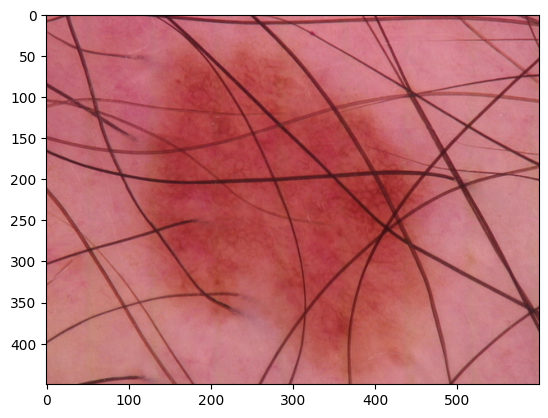

In [ ]:
path_train = 'nev00014.jpg'
image_read = cv2.imread(path_train)
image_show = plt.imshow(cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB))

Mean Value: 128.11298148148148
Standard Deviation: 50.06517410977048


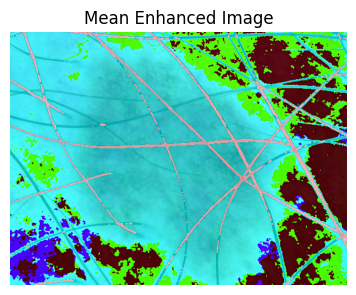

In [ ]:
# 2_IMAGE ENHANCEMENT
# 2.1 Mean
def calculate_mean(image):
    return np.mean(image)

# 2.2 Standard Deviation
def calculate_std_dev(image):
    return np.std(image)

# Calculate mean and standard deviation of the noise-removed image
mean_value = calculate_mean(noise_removed_image)
std_dev_value = calculate_std_dev(noise_removed_image)

print(f"Mean Value: {mean_value}")
print(f"Standard Deviation: {std_dev_value}")

# ------------------------------
# PLOT RESULTS
# ------------------------------

# Mean enhancement (Brightness adjustment)
mean_enhanced_image = noise_removed_image + int(mean_value)

# Standard Deviation enhancement (Contrast adjustment)
std_dev_enhanced_image = cv2.convertScaleAbs(noise_removed_image, alpha=std_dev_value)

# Plotting the enhanced images
plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(mean_enhanced_image,cv2.COLOR_BGR2RGB))
plt.title('Mean Enhanced Image')
plt.axis('off')

plt.show()

Image is Grayscale
Hair-Removed Image is Grayscale
Statistics for Hair-Removed Image:
Minimum Value: 0
Mean Value: 205.3005
Maximum Value: 255

Segmented Image is Grayscale
Statistics for Segmented Image:
Minimum Value: 0
Mean Value: 188.30805555555557
Maximum Value: 255



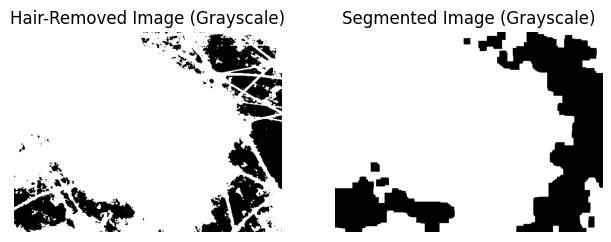

In [ ]:
# 3. SEGMENTATION

# Function to print image statistics
def print_image_statistics(image, label):
    print(f"Statistics for {label} Image:")
    print(f"Minimum Value: {np.min(image)}")
    print(f"Mean Value: {np.mean(image)}")
    print(f"Maximum Value: {np.max(image)}")
    print()

# 3.1 RGB to gray
def rgb_to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3.2 OTSU's thresholding
def otsu_thresholding(image_gray):
    _, thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    print(f"Selected Otsu Threshold: {_}")
    return thresh

# 3.3 Hair removal
def remove_hair(image):
    # Check if the image is grayscale or RGB
    if len(image.shape) == 2:
        print("Image is Grayscale")
        return image  # No hair removal for grayscale images
    elif len(image.shape) == 3 and image.shape[2] == 3:
        print("Image is RGB")
    elif len(image.shape) == 3 and image.shape[2] == 1:
        print("Image is Binary")
        return image  # No hair removal for binary images

    # Convert the RGB image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define a lower and upper threshold for the skin color in HSV
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

    # Create a mask using the inRange function
    mask_skin = cv2.inRange(hsv, lower_skin, upper_skin)

    # Apply the mask to the original RGB image
    result_skin = cv2.bitwise_and(image, image, mask=mask_skin)

    # Use morphological operations with a line-shaped kernel for hair removal
    kernel_line = np.ones((1, 5), np.uint8)  # Line-shaped kernel
    result_hair_removed = cv2.morphologyEx(result_skin, cv2.MORPH_OPEN, kernel_line, iterations=2)

    return result_hair_removed

# 3.4 Morphological operations
def morphological_operations(image):
    kernel = np.ones((7, 7), np.uint8)
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=2)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)
    return closing

# Hair removal
hair_removed_image = remove_hair(otsu_thresholded_image)

# Print image type information
if len(hair_removed_image.shape) == 2:
    print("Hair-Removed Image is Grayscale")
elif len(hair_removed_image.shape) == 3 and hair_removed_image.shape[2] == 3:
    print("Hair-Removed Image is RGB")
elif len(hair_removed_image.shape) == 3 and hair_removed_image.shape[2] == 1:
    print("Hair-Removed Image is Binary")

# Print statistics for Hair-Removed Image
print_image_statistics(hair_removed_image, 'Hair-Removed')

# Perform morphological operations
segmented_image = morphological_operations(hair_removed_image)

# Print image type information
if len(segmented_image.shape) == 2:
    print("Segmented Image is Grayscale")
elif len(segmented_image.shape) == 3 and segmented_image.shape[2] == 3:
    print("Segmented Image is RGB")
elif len(segmented_image.shape) == 3 and segmented_image.shape[2] == 1:
    print("Segmented Image is Binary")

# Print statistics for Morphological Operations result
print_image_statistics(segmented_image, 'Segmented')

# Plotting the segmentation results
plt.figure(figsize=(20, 6))

# Hair removal result
plt.subplot(1, 5, 3)
if len(hair_removed_image.shape) == 2:
    plt.imshow(hair_removed_image, cmap='gray')
    plt.title('Hair-Removed Image (Grayscale)')
elif len(hair_removed_image.shape) == 3:
    plt.imshow(hair_removed_image)
    plt.title('Hair-Removed Image (RGB)')
plt.axis('off')

# Morphological operations result
plt.subplot(1, 5, 4)
if len(segmented_image.shape) == 2:
    plt.imshow(segmented_image, cmap='gray')
    plt.title('Segmented Image (Grayscale)')
elif len(segmented_image.shape) == 3:
    plt.imshow(segmented_image)
    plt.title('Segmented Image (RGB)')
plt.axis('off')

plt.show()

# 5to

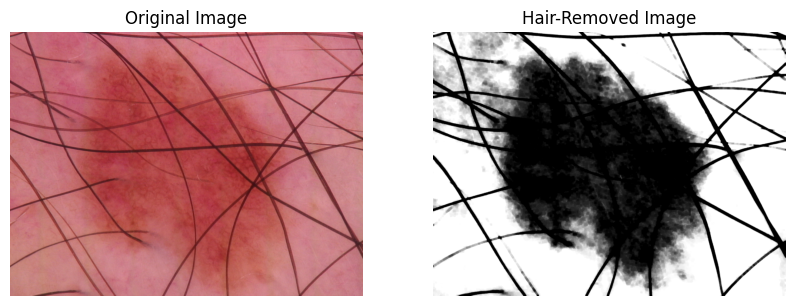

In [ ]:
# Load the image
path_train = 'nev00014.jpg'
image_read = cv2.imread(path_train)
image_rgb = cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB)

# Function to perform contrast stretching
def contrast_stretching(image):
    avg = np.mean(image)
    std_dev = np.std(image)
    low_in = avg - 0.4 * std_dev
    high_in = avg + 0.4 * std_dev

    # Clip and scale intensity values to the range [0, 255]
    stretched_image = np.clip((image - low_in) / (high_in - low_in) * 255, 0, 255).astype(np.uint8)

    return stretched_image

# Function to perform hair removal using bottom-hat filtering
def remove_hair(image):
    kernel = np.ones((5, 5), np.uint8)
    bottom_hat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)
    result = cv2.add(image, bottom_hat)
    return result

# Resize the image to 767x1022
image_resized = cv2.resize(image_rgb, (1022, 767))

# Noise removal with a 3x3 median filter
image_noise_removed = cv2.medianBlur(image_resized, 3)

# Contrast stretching on R, G, and B channels separately
contrast_stretched_r = contrast_stretching(image_noise_removed[:, :, 0])
contrast_stretched_g = contrast_stretching(image_noise_removed[:, :, 1])
contrast_stretched_b = contrast_stretching(image_noise_removed[:, :, 2])

# Concatenate the contrast-stretched channels
image_contrast_stretched = np.stack([contrast_stretched_r, contrast_stretched_g, contrast_stretched_b], axis=-1)

# Convert to grayscale
image_gray = cv2.cvtColor(image_contrast_stretched, cv2.COLOR_RGB2GRAY)

# Hair removal using bottom-hat filtering
image_hair_removed = remove_hair(image_gray)

# Display the original and pre-processed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_hair_removed, cmap='gray')
plt.title('Hair-Removed Image')
plt.axis('off')

plt.show()

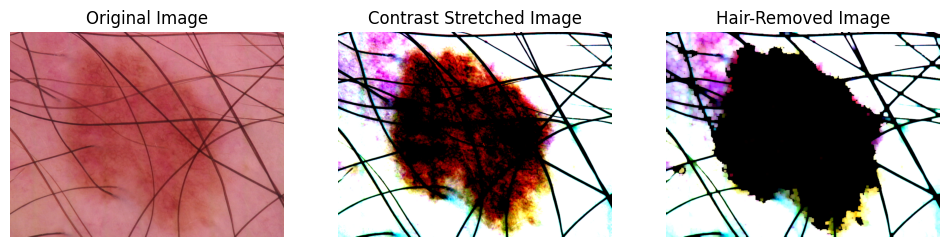

In [ ]:
# Load the image
path_train = 'nev00014.jpg'
image_read = cv2.imread(path_train)
image_rgb = cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB)

# Function to perform contrast stretching
def contrast_stretching(image):
    avg = np.mean(image)
    std_dev = np.std(image)
    low_in = avg - 0.4 * std_dev
    high_in = avg + 0.4 * std_dev

    # Clip and scale intensity values to the range [0, 255]
    stretched_image = np.clip((image - low_in) / (high_in - low_in) * 255, 0, 255).astype(np.uint8)

    return stretched_image

# Function to perform hair removal using morphological operations
def remove_hair(image):
    # Convert the RGB image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Define a lower and upper threshold for the hair color in HSV
    lower_hair = np.array([0, 20, 70], dtype=np.uint8)
    upper_hair = np.array([20, 255, 255], dtype=np.uint8)

    # Create a mask using the inRange function
    mask_hair = cv2.inRange(hsv, lower_hair, upper_hair)

    # Apply the mask to the original RGB image
    result_hair_removed = cv2.bitwise_and(image, image, mask=255 - mask_hair)

    # Use morphological operations to further refine hair removal
    kernel = np.ones((5, 5), np.uint8)
    result_hair_removed = cv2.morphologyEx(result_hair_removed, cv2.MORPH_OPEN, kernel, iterations=2)

    return result_hair_removed

# Resize the image to 767x1022
image_resized = cv2.resize(image_rgb, (1022, 767))

# Noise removal with a 3x3 median filter
image_noise_removed = cv2.medianBlur(image_resized, 3)

# Contrast stretching on R, G, and B channels separately
contrast_stretched_r = contrast_stretching(image_noise_removed[:, :, 0])
contrast_stretched_g = contrast_stretching(image_noise_removed[:, :, 1])
contrast_stretched_b = contrast_stretching(image_noise_removed[:, :, 2])

# Concatenate the contrast-stretched channels
image_contrast_stretched = np.stack([contrast_stretched_r, contrast_stretched_g, contrast_stretched_b], axis=-1)

# Hair removal using morphological operations
image_hair_removed = remove_hair(image_contrast_stretched)

# Display the original and pre-processed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_contrast_stretched)
plt.title('Contrast Stretched Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_hair_removed)
plt.title('Hair-Removed Image')
plt.axis('off')

plt.show()

Statistics for Resized Image:
Minimum Value: 12
Mean Value: 127.89879453415557
Maximum Value: 228

Statistics for Resized Channel 1:
Minimum Value: 60
Mean Value: 185.46033163493112
Maximum Value: 228

Statistics for Resized Channel 2:
Minimum Value: 12
Mean Value: 97.19171448472586
Maximum Value: 155

Statistics for Resized Channel 3:
Minimum Value: 12
Mean Value: 101.04433748280974
Maximum Value: 166

Statistics for Noise Removed Image:
Minimum Value: 13
Mean Value: 127.91708999150373
Maximum Value: 226

Statistics for Noise Removed Channel 1:
Minimum Value: 61
Mean Value: 185.48231858691577
Maximum Value: 226

Statistics for Noise Removed Channel 2:
Minimum Value: 13
Mean Value: 97.20942141211471
Maximum Value: 152

Statistics for Noise Removed Channel 3:
Minimum Value: 15
Mean Value: 101.05952997548076
Maximum Value: 162

Statistics for Contrast Stretched Image:
Minimum Value: 0
Mean Value: 145.35667041726944
Maximum Value: 255

Statistics for Contrast Stretched Channel 1:
Minimum 

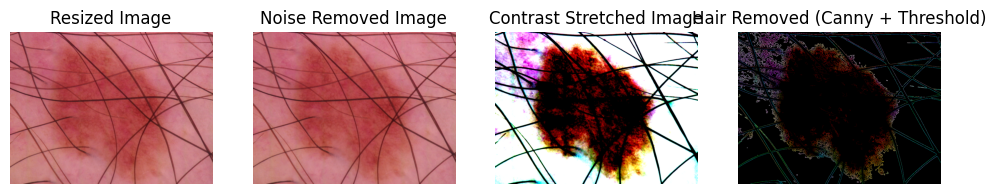

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to print image statistics
def print_image_statistics(image, label):
    print(f"Statistics for {label} Image:")
    print(f"Minimum Value: {np.min(image)}")
    print(f"Mean Value: {np.mean(image)}")
    print(f"Maximum Value: {np.max(image)}")
    print()

# Function to print channel statistics
def print_channel_statistics(image, label):
    for i in range(image.shape[2]):
        channel = image[:, :, i]
        print(f"Statistics for {label} Channel {i + 1}:")
        print(f"Minimum Value: {np.min(channel)}")
        print(f"Mean Value: {np.mean(channel)}")
        print(f"Maximum Value: {np.max(channel)}")
        print()

# Function to perform contrast stretching
def contrast_stretching(image):
    avg = np.mean(image)
    std_dev = np.std(image)
    low_in = avg - 0.4 * std_dev
    high_in = avg + 0.4 * std_dev

    # Clip and scale intensity values to the range [0, 255]
    stretched_image = np.clip((image - low_in) / (high_in - low_in) * 255, 0, 255).astype(np.uint8)

    return stretched_image

# Function to perform hair removal using Canny edge detection and binary thresholding
def remove_hair_canny_threshold(image):
    # Convert the RGB image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply Canny edge detector
    edges = cv2.Canny(gray, 50, 150)

    # Apply binary thresholding to create a mask
    _, mask_hair = cv2.threshold(edges, 50, 255, cv2.THRESH_BINARY)

    # Apply the mask to the original RGB image
    result_hair_removed = cv2.bitwise_and(image, image, mask=mask_hair)

    return result_hair_removed

# Load the image
path_train = 'nev00014.jpg'
image_read = cv2.imread(path_train)
image_rgb = cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB)

# Resize the image to 767x1022
image_resized = cv2.resize(image_rgb, (1022, 767))

# Noise removal with a 3x3 median filter
image_noise_removed = cv2.medianBlur(image_resized, 3)

# Contrast stretching on R, G, and B channels separately
contrast_stretched_r = contrast_stretching(image_noise_removed[:, :, 0])
contrast_stretched_g = contrast_stretching(image_noise_removed[:, :, 1])
contrast_stretched_b = contrast_stretching(image_noise_removed[:, :, 2])

# Concatenate the contrast-stretched channels
image_contrast_stretched = np.stack([contrast_stretched_r, contrast_stretched_g, contrast_stretched_b], axis=-1)

# Hair removal using Canny edge detection and binary thresholding
image_hair_removed_canny_threshold = remove_hair_canny_threshold(image_contrast_stretched)

# Print image and channel statistics
print_image_statistics(image_resized, 'Resized')
print_channel_statistics(image_resized, 'Resized')
print_image_statistics(image_noise_removed, 'Noise Removed')
print_channel_statistics(image_noise_removed, 'Noise Removed')
print_image_statistics(image_contrast_stretched, 'Contrast Stretched')
print_channel_statistics(image_contrast_stretched, 'Contrast Stretched')
print_image_statistics(image_hair_removed_canny_threshold, 'Hair Removed (Canny + Threshold)')
print_channel_statistics(image_hair_removed_canny_threshold, 'Hair Removed (Canny + Threshold)')

# Display the original and pre-processed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image_resized)
plt.title('Resized Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(image_noise_removed)
plt.title('Noise Removed Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(image_contrast_stretched)
plt.title('Contrast Stretched Image')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(image_hair_removed_canny_threshold)
plt.title('Hair Removed (Canny + Threshold)')
plt.axis('off')

plt.show()

Statistics for Resized Image:
Minimum Value: 12
Mean Value: 127.89879453415557
Maximum Value: 228

Statistics for Resized Channel 1:
Minimum Value: 60
Mean Value: 185.46033163493112
Maximum Value: 228
Statistics for Resized Channel 2:
Minimum Value: 12
Mean Value: 97.19171448472586
Maximum Value: 155
Statistics for Resized Channel 3:
Minimum Value: 12
Mean Value: 101.04433748280974
Maximum Value: 166

Statistics for Noise Removed Image:
Minimum Value: 13
Mean Value: 127.91708999150373
Maximum Value: 226

Statistics for Noise Removed Channel 1:
Minimum Value: 61
Mean Value: 185.48231858691577
Maximum Value: 226
Statistics for Noise Removed Channel 2:
Minimum Value: 13
Mean Value: 97.20942141211471
Maximum Value: 152
Statistics for Noise Removed Channel 3:
Minimum Value: 15
Mean Value: 101.05952997548076
Maximum Value: 162

Statistics for Contrast Stretched Image:
Minimum Value: 0
Mean Value: 145.35667041726944
Maximum Value: 255

Statistics for Contrast Stretched Channel 1:
Minimum Valu

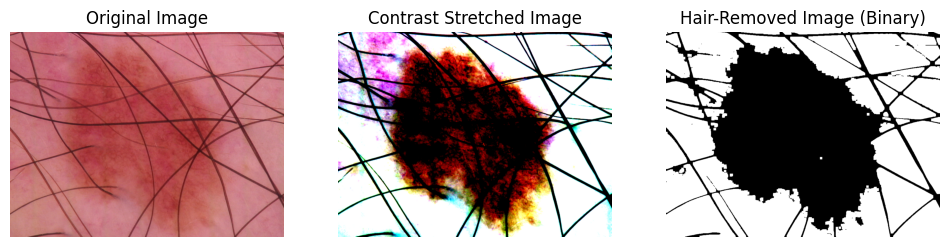

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to print image statistics
def print_image_statistics(image, label):
    print(f"Statistics for {label} Image:")
    print(f"Minimum Value: {np.min(image)}")
    print(f"Mean Value: {np.mean(image)}")
    print(f"Maximum Value: {np.max(image)}")
    print()

# Function to print channel statistics
def print_channel_statistics(image, label):
    if len(image.shape) == 2:
        # Grayscale image
        channel = image
        print(f"Statistics for {label} Image (Single Channel):")
        print(f"Minimum Value: {np.min(channel)}")
        print(f"Mean Value: {np.mean(channel)}")
        print(f"Maximum Value: {np.max(channel)}")
    elif len(image.shape) == 3:
        # RGB image
        for i in range(image.shape[2]):
            channel = image[:, :, i]
            print(f"Statistics for {label} Channel {i + 1}:")
            print(f"Minimum Value: {np.min(channel)}")
            print(f"Mean Value: {np.mean(channel)}")
            print(f"Maximum Value: {np.max(channel)}")
    print()

# Load the image
path_train = 'nev00014.jpg'
image_read = cv2.imread(path_train)
image_rgb = cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB)

# Function to perform contrast stretching
def contrast_stretching(image):
    avg = np.mean(image)
    std_dev = np.std(image)
    low_in = avg - 0.4 * std_dev
    high_in = avg + 0.4 * std_dev

    # Clip and scale intensity values to the range [0, 255]
    stretched_image = np.clip((image - low_in) / (high_in - low_in) * 255, 0, 255).astype(np.uint8)

    return stretched_image

# Function to perform hair removal using morphological operations
def remove_hair(image):
    # Convert the RGB image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Define a lower and upper threshold for the hair color in HSV
    lower_hair = np.array([0, 20, 70], dtype=np.uint8)
    upper_hair = np.array([20, 255, 255], dtype=np.uint8)

    # Create a mask using the inRange function
    mask_hair = cv2.inRange(hsv, lower_hair, upper_hair)

    # Apply the mask to the original RGB image
    result_hair_removed = cv2.bitwise_and(image, image, mask=255 - mask_hair)

    # Use morphological operations to further refine hair removal
    kernel = np.ones((5, 5), np.uint8)
    result_hair_removed = cv2.morphologyEx(result_hair_removed, cv2.MORPH_OPEN, kernel, iterations=2)

    return result_hair_removed

# Resize the image to 767x1022
image_resized = cv2.resize(image_rgb, (1022, 767))

# Noise removal with a 3x3 median filter
image_noise_removed = cv2.medianBlur(image_resized, 3)

# Contrast stretching on R, G, and B channels separately
contrast_stretched_r = contrast_stretching(image_noise_removed[:, :, 0])
contrast_stretched_g = contrast_stretching(image_noise_removed[:, :, 1])
contrast_stretched_b = contrast_stretching(image_noise_removed[:, :, 2])

# Concatenate the contrast-stretched channels
image_contrast_stretched = np.stack([contrast_stretched_r, contrast_stretched_g, contrast_stretched_b], axis=-1)

# Hair removal using morphological operations
image_hair_removed = remove_hair(image_contrast_stretched)

# Binarize the hair-removed image
_, image_hair_removed_binary = cv2.threshold(cv2.cvtColor(image_hair_removed, cv2.COLOR_RGB2GRAY), 1, 255, cv2.THRESH_BINARY)

# Print image and channel statistics
print_image_statistics(image_resized, 'Resized')
print_channel_statistics(image_resized, 'Resized')
print_image_statistics(image_noise_removed, 'Noise Removed')
print_channel_statistics(image_noise_removed, 'Noise Removed')
print_image_statistics(image_contrast_stretched, 'Contrast Stretched')
print_channel_statistics(image_contrast_stretched, 'Contrast Stretched')
print_image_statistics(image_hair_removed_binary, 'Hair Removed (Binary)')
print_channel_statistics(image_hair_removed_binary, 'Hair Removed (Binary)')

# Display the original and pre-processed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_contrast_stretched)
plt.title('Contrast Stretched Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_hair_removed_binary, cmap='gray')
plt.title('Hair-Removed Image (Binary)')
plt.axis('off')

plt.show()

# Attemp for machine learning

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define the directory containing segmented images
segmented_directory = 'path/to/segmented/images'  # Replace with the actual path

# Initialize lists to store features and labels
features = []
labels = []

# Function to extract features from an image (replace with your feature extraction method)
def extract_features_from_image(image):
    # Preprocess and extract features (replace this with your actual feature extraction code)
    # For example, you can use img = preprocess_and_extract_features(img)
    return img_features

# Process segmented images and assign labels
for filename in os.listdir(segmented_directory):
    image_path = os.path.join(segmented_directory, filename)
    img = cv2.imread(image_path)
    img_features = extract_features_from_image(img)

    # Determine the label based on the directory structure
    if "nevus" in image_path.lower():
        label = 1  # Positive label
    elif "others" in image_path.lower():
        label = 0  # Negative label
    else:
        continue  # Skip images in other folders

    # Append features and labels to their respective lists
    features.append(img_features)
    labels.append(label)

# Convert lists to NumPy arrays
features = np.array(features)
labels = np.array(labels)

# Split the combined array into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

# Now, X_train and y_train contain training data, and X_val and y_val contain validation data
